#Import das bibliotecas

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Import dos dataframes

In [270]:
df_features = pd.read_csv('/content/features.csv')
df_stores = pd.read_csv('/content/stores.csv')
df_train = pd.read_csv('/content/train.csv')

In [271]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [273]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [274]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [275]:
df_train.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

#União das tabelas

In [277]:
df = df_features.merge(df_stores, how='left', on= ['Store'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [279]:
df2 = df.merge(df_train, how='inner', on=['Date', 'Store','IsHoliday'])

In [281]:
df2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


#EDA Wallmart

In [283]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [284]:
df2.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
dtype: int64

In [285]:
df2.duplicated().sum()

0

In [286]:
df2.fillna(0, inplace= True)

In [287]:
df2['IsHoliday'] = df2.apply(lambda x: 1 if x['IsHoliday'] == True else 0, axis=1)

In [288]:
df2 = df2.assign(Date= pd.to_datetime(df2['Date'],format= '%Y-%m-%d'))

In [289]:
df2['promo'] = df2.apply(lambda x: 1 if ((x['MarkDown1']>0) or (x['MarkDown2']>0) or (x['MarkDown3']>0) or (x['MarkDown4']>0) or (x['MarkDown5']>0)) else 0, axis=1)
df2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,promo
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,1,24924.50,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,2,50605.27,0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,3,13740.12,0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,4,39954.04,0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,5,32229.38,0


In [290]:
df2['PromoDisp'] = df2.apply(lambda x: 1 if x['Date'] >= datetime(2011,11,1) else 0, axis=1)
df2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,promo,PromoDisp
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,1,24924.50,0,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,2,50605.27,0,0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,3,13740.12,0,0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,4,39954.04,0,0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315,5,32229.38,0,0


In [291]:
df2.shape

(421570, 18)

In [292]:
df2.drop(['Store','promo','PromoDisp'],axis=1).describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.070358,136727.915739,44.260317,15981.258123
std,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.255750,60980.583328,30.492054,22711.183519
min,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000,1.000000,-4988.940000
1%,18.300000,2.565000,0.000000,0.000000,0.000000,0.000000,0.000000,126.111903,4.156000,0.000000,34875.000000,1.000000,5.000000
10%,33.980000,2.720000,0.000000,0.000000,0.000000,0.000000,0.000000,128.823806,5.965000,0.000000,39910.000000,7.000000,291.097000
25%,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000,18.000000,2079.650000
50%,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000,37.000000,7612.030000
75%,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,0.000000,202505.000000,74.000000,20205.852500
90%,83.580000,3.917000,8624.560000,452.880000,74.410000,2828.890000,5284.630000,219.444244,9.816000,0.000000,204184.000000,92.000000,42845.673000


#Análise Gráfica do Dataset

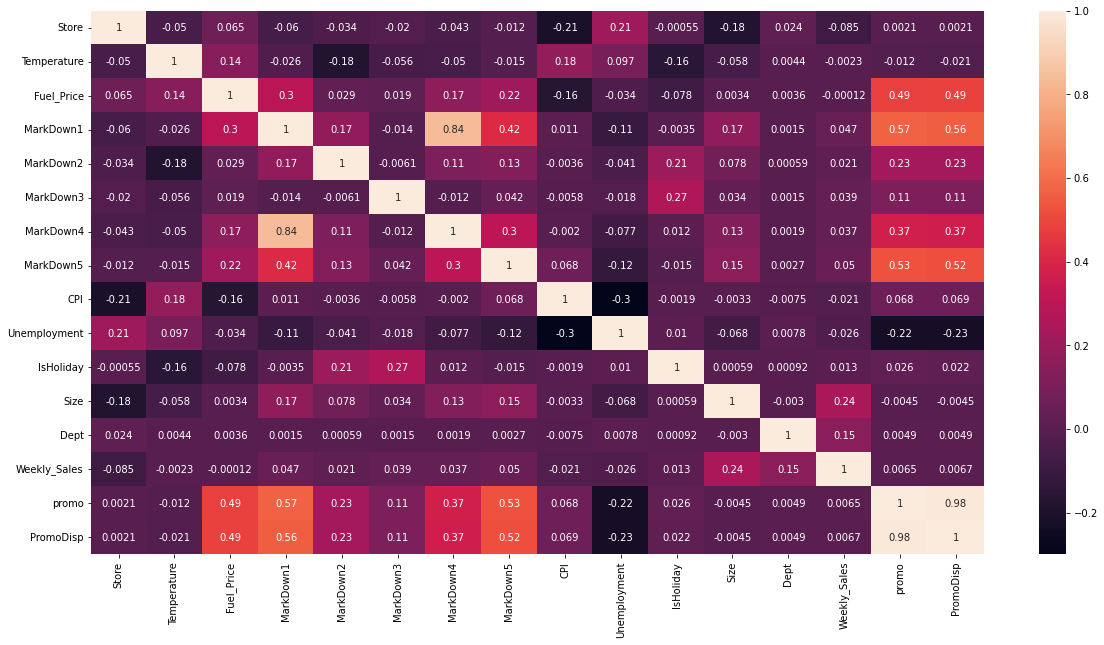

In [293]:
plt.figure(figsize=(20,10))

sns.heatmap(df2.corr(), annot=True)

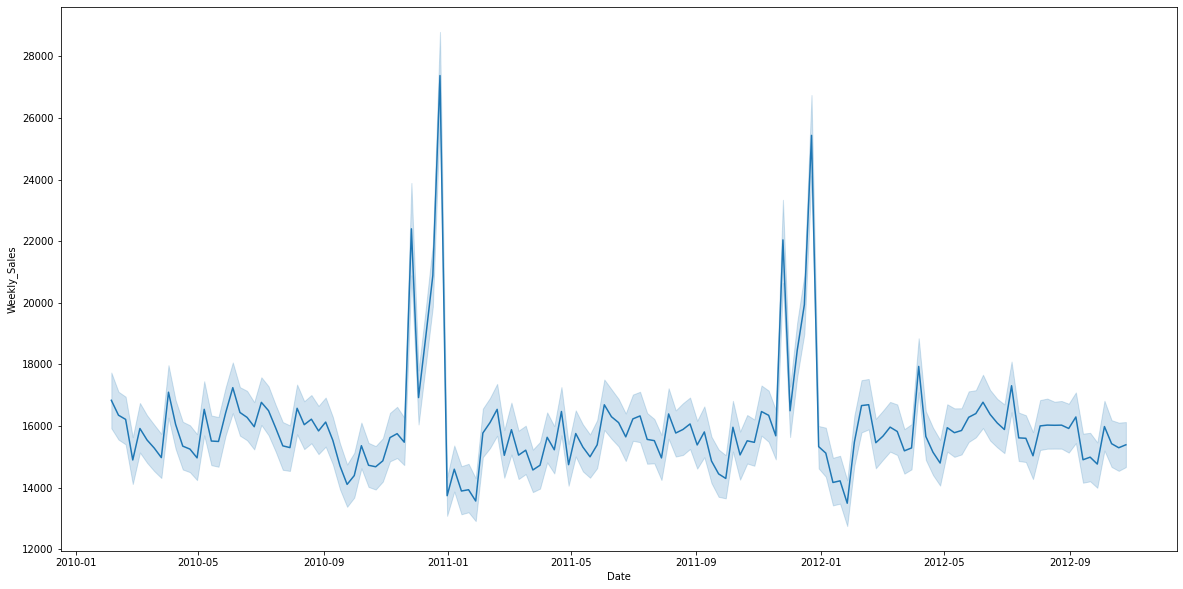

In [294]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df2,x='Date', y = 'Weekly_Sales')

#Transformação de Dados

In [295]:
df2 = pd.get_dummies(df2, columns=['Store', 'Dept', 'Type'])

#Normalização dos Dados

In [296]:
X = df2.drop(['Weekly_Sales', 'Date'], axis=1)
y = df2['Weekly_Sales']

In [312]:
X.shape

(421570, 142)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [299]:
X_test.shape

(84314, 142)

In [300]:
X_train = X_train.reset_index().drop('index',axis=1)
X_test = X_test.reset_index().drop('index',axis=1)
y_train = y_train.reset_index().drop('index',axis=1)
y_test = y_test.reset_index().drop('index',axis=1) 

In [301]:
scaler = StandardScaler()
lista = ['Temperature', 'Fuel_Price','MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5','CPI',	'Unemployment', 'Size']
scaler.fit(X_train[lista])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [302]:
#X_train[lista] = scaler.transform(X_train[lista])

In [303]:
# Transformanda para dataframe para visualização
X_train[lista] = pd.DataFrame(scaler.transform(X_train[lista]),columns = lista)
X_test[lista] = pd.DataFrame(scaler.transform(X_test[lista]),columns = lista)

In [304]:
X_train.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,promo,PromoDisp,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,...,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
0,-0.234950,1.812672,-0.428144,-0.172305,-0.084500,-0.278491,-0.395730,-0.936605,0.135428,0,1.098997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.676817,-1.769631,-0.428144,-0.172305,-0.084500,-0.278491,-0.395730,0.468282,0.566350,0,1.085679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.476798,-1.036590,-0.428144,-0.172305,-0.084500,-0.278491,-0.395730,1.018049,0.109100,0,-1.538932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.545286,1.707952,0.568950,-0.168632,-0.076896,0.252153,0.617363,-1.030694,-0.310538,0,-0.168982,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.962358,1.208349,-0.428144,-0.172305,-0.084500,-0.278491,-0.395730,-0.804178,-0.059078,0,1.104984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [305]:
from sklearn.linear_model import LinearRegression

In [306]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
y_pred = lin.predict(X_test)

In [309]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [317]:
print(f'r2_score = {r2_score(y_test,y_pred)}')
print(f'mean_absolute_error = {mean_absolute_error(y_test,y_pred)}')
print(f'mean_squared_error = {mean_squared_error(y_test,y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test,y_pred))}')

r2_score = 0.6536923117319049
mean_absolute_error = 8178.51571884933
mean_squared_error = 178461642.55807707
RMSE = 13358.953647575736


#SGDRegressor

In [320]:
from sklearn.linear_model import SGDRegressor

In [322]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_sgd = sgd.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [323]:
print(f'r2_score = {r2_score(y_test,y_sgd)}')
print(f'mean_absolute_error = {mean_absolute_error(y_test,y_sgd)}')
print(f'mean_squared_error = {mean_squared_error(y_test,y_sgd)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test,y_sgd))}')

r2_score = 0.6532213445575337
mean_absolute_error = 8181.332569428909
mean_squared_error = 178704344.5782071
RMSE = 13368.03443211481


#GradientBoostingRegressor

In [324]:
from sklearn.ensemble import GradientBoostingRegressor

In [325]:
gra = GradientBoostingRegressor()
gra.fit(X_train, y_train)
y_gra = gra.predict(X_test)
print(f'r2_score = {r2_score(y_test,y_gra)}')
print(f'mean_absolute_error = {mean_absolute_error(y_test,y_gra)}')
print(f'mean_squared_error = {mean_squared_error(y_test,y_gra)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test,y_gra))}')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score = 0.7158098655121772
mean_absolute_error = 8023.922893179392
mean_squared_error = 146450800.5962459
RMSE = 12101.68585760868


#ExtraTreesRegressor

In [326]:
from sklearn.ensemble import ExtraTreesRegressor

In [328]:
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_etr = etr.predict(X_test)
print(f'r2_score = {r2_score(y_test,y_etr)}')
print(f'mean_absolute_error = {mean_absolute_error(y_test,y_etr)}')
print(f'mean_squared_error = {mean_squared_error(y_test,y_etr)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test,y_etr))}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


KeyboardInterrupt: ignored

#RandomForestRegressor

In [329]:
from sklearn.ensemble import RandomForestRegressor 

In [330]:
rfr = RandomForestRegressor(max_depth=2)
rfr.fit(X_train, y_train)
y_rfr = rfr.predict(X_test)
print(f'r2_score = {r2_score(y_test,y_rfr)}')
print(f'mean_absolute_error = {mean_absolute_error(y_test,y_rfr)}')
print(f'mean_squared_error = {mean_squared_error(y_test,y_rfr)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test,y_rfr))}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r2_score = 0.24131204852085575
mean_absolute_error = 13580.413630587416
mean_squared_error = 390972255.58900386
RMSE = 19773.01837325308


#HuberRegressor


In [331]:
from sklearn.linear_model import HuberRegressor

In [332]:
hr = HuberRegressor()
hr.fit(X_train, y_train)
y_hr = hr.predict(X_test)
print(f'r2_score = {r2_score(y_test,y_hr)}')
print(f'mean_absolute_error = {mean_absolute_error(y_test,y_hr)}')
print(f'mean_squared_error = {mean_squared_error(y_test,y_hr)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test,y_hr))}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score = 0.6201721358090116
mean_absolute_error = 7407.5847498429275
mean_squared_error = 195735488.49534717
RMSE = 13990.549971153641


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#Otimização Hiperparametro


In [333]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'criterion':['mse', 'mae', 'squared_error']}
gra = GradientBoostingRegressor()
grd = GridSearchCV(gra, parameters, scoring='neg_mean_absolute_error')
grd.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 